##PROBLEM STATEMENT
THE KEY ISSUES ARE THE FLYING PATTERN AND THE USE OF FLYER POINT

##OBJECTIVE
###MINIMISE:
THE   USE OF FLYER POINT
###MAXIMIZE:
THE CUSTOMER SATISFACTION AND PROFIT OF AIRLINES

WE NEED TO TAKE THIS PROCESS MODEL IN SIX PHASE

1.BUSINESS UNSERSTANDING

2.DATA PREPARATION

3.MODEL BUILDING

4.MODEL EVALUATION

5.DEPLOYMENT

6.MONITORING AND MAINTENANCE

BUSINESS SUCCESS CRITERIA: REDUCE THE USE OF FREQUENT FLYER POINT ANYWHERE AROUND 30-40%

ML SUCCESS CRITERIA:ACHIEVE SILHOUTTE COFFICIENT ATLEAST 0.6

ECONOMIC SUCCESS CRITERIA:IF WE UNDERSTAND THE PATTERNS AND REDUCE THE USE OF FLYER POINT THEN THE PROFIT IS AUTOMATICALLY GOING TO INCREASE
##PROPOSED PLANS:
GOUPING THE CUSTOMER IN THE SECTION DEPENDING UPON THE USAGE OF FLYER POINT AND THEIR TRAVELLING PATTERN.

#DATA COLLECTION 
THIS DATA CONTAINS THE LIST AROUND 4000 COUSTOMERS 
 
12 FEATURES ARE RECORDED FOR EACH CUSTOMER AS THEIR UNIQUE ID

##DESCRIPTION OF DATA SET WHAT THE EACH COLUMN MEANS
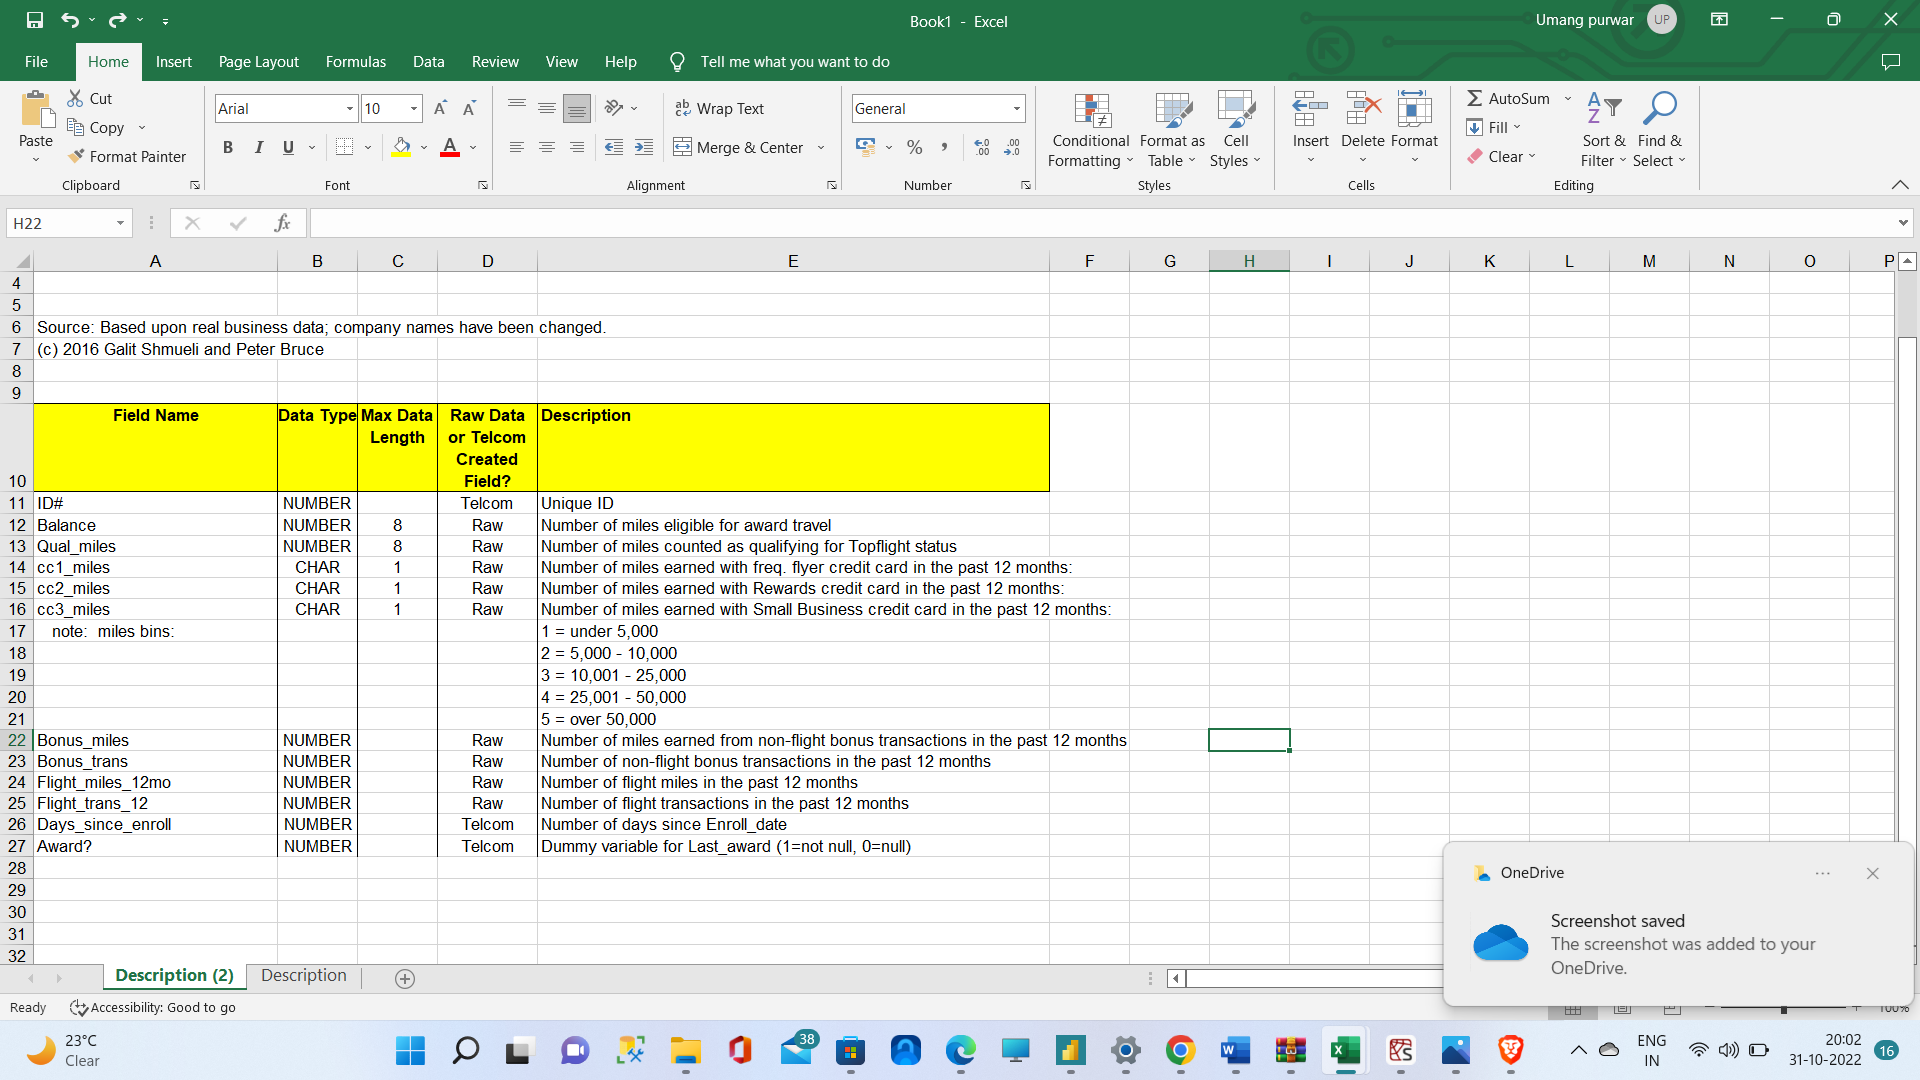

START WORKING ON IT BY IMPORTING SOME OF ITS BASIC LIBRARY

In [305]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import feature_engine

import the data

In [307]:
data=pd.read_excel(r"/content/EastWestAirlines (1).xlsx")

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [309]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [310]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


lets remove unuseful columns

In [311]:
data.drop(['ID#','Award?'],axis=1,inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


First business moment

In [312]:
print("mean\n",data.mean())
print("mode\n",data.mode())
print("meadian\n",data.median())

mean
 Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
dtype: float64
mode
    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1000           0          1          1          1            0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0            0                  0                0               8296  
meadian
 Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
dtype: float64


Second business moment

In [313]:
print('variance\n',data.var())
print('standerd deviation\n',data.std())

variance
 Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
dtype: float64
standerd deviation
 Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
dtype: float64


skewness

In [314]:
data.skew()

Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
dtype: float64

kurtosis

In [315]:
data.kurt()

Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
dtype: float64

In [316]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
dtype: object

TYPECASTING

NEED TO CONVERT cc1_miles,cc2_miles,cc3_miles data types int to string

In [317]:
data.cc1_miles=data.cc1_miles.astype('str')
data.cc2_miles=data.cc2_miles.astype('str')
data.cc3_miles=data.cc3_miles.astype('str')
data.dtypes

Balance               int64
Qual_miles            int64
cc1_miles            object
cc2_miles            object
cc3_miles            object
Bonus_miles           int64
Bonus_trans           int64
Flight_miles_12mo     int64
Flight_trans_12       int64
Days_since_enroll     int64
dtype: object

In [318]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

check for the duplicates in data

In [319]:
data.duplicated().sum()

1

In [320]:
data=data.drop_duplicates()
data.duplicated().sum()

0

before checking for outliers lets normalise the data as we see the large scale difference

In [321]:
from sklearn.preprocessing import MinMaxScaler
minmaxscale=MinMaxScaler()
data1=minmaxscale.fit_transform(data)
data1=pd.DataFrame(data)


In [322]:
data1.columns=(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'])
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3998.0,73619.486993,100781.726667,0.0,18534.25,43138.0,92405.00,1704838.0
Qual_miles,3998.0,144.150575,773.757220,0.0,0.00,0.0,0.00,11148.0
Bonus_miles,3998.0,17149.134567,24152.465996,0.0,1250.00,7183.0,23810.75,263685.0
Bonus_trans,3998.0,11.604802,9.603258,0.0,3.00,12.0,17.00,86.0
Flight_miles_12mo,3998.0,460.170835,1400.365407,0.0,0.00,0.0,313.50,30817.0
Flight_trans_12,3998.0,1.373937,3.793585,0.0,0.00,0.0,1.00,53.0
Days_since_enroll,3998.0,4119.190095,2065.007629,2.0,2331.25,4097.5,5790.75,8296.0


check for data types

In [323]:
data1.dtypes

Balance               int64
Qual_miles            int64
cc1_miles            object
cc2_miles            object
cc3_miles            object
Bonus_miles           int64
Bonus_trans           int64
Flight_miles_12mo     int64
Flight_trans_12       int64
Days_since_enroll     int64
dtype: object

now need to typecaste the data like cc1_miles,cc2_miles,cc3_miles as object

In [324]:
data1.cc1_miles=data.cc1_miles.astype('str')
data1.cc2_miles=data.cc2_miles.astype('str')
data1.cc3_miles=data.cc3_miles.astype('str')
data1.dtypes

Balance               int64
Qual_miles            int64
cc1_miles            object
cc2_miles            object
cc3_miles            object
Bonus_miles           int64
Bonus_trans           int64
Flight_miles_12mo     int64
Flight_trans_12       int64
Days_since_enroll     int64
dtype: object

check for outliers and then treat them

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


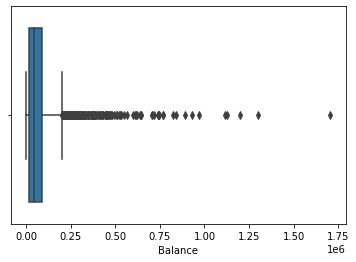

In [325]:
sns.boxplot(data1.Balance)

we can treat its outlier as median is avobe zero 

In [326]:
from feature_engine.outliers import Winsorizer

In [327]:
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail='both',
                      fold=1.5,
                      variables=['Balance'])
data1['Balance']=winsor_iqr.fit_transform(data1[['Balance']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


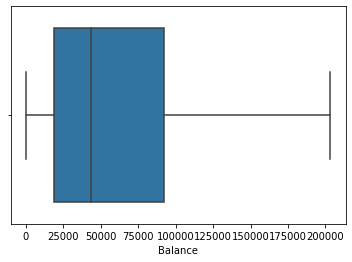

In [328]:
sns.boxplot(data1.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


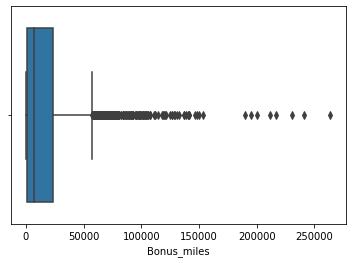

In [329]:
sns.boxplot(data1.Bonus_miles)

In [330]:
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail='both',
                      fold=1.5,
                      variables=['Bonus_miles'])
data1['Bonus_miles']=winsor_iqr.fit_transform(data1[['Bonus_miles']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


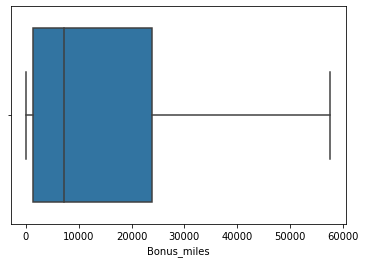

In [331]:
sns.boxplot(data1.Bonus_miles)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


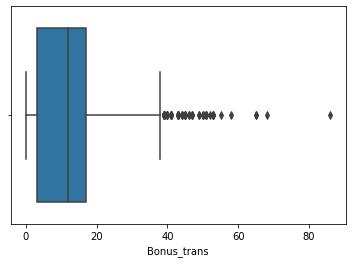

In [332]:
sns.boxplot(data1.Bonus_trans)

In [333]:
winsor_iqr=Winsorizer(capping_method="iqr",
                      tail="both"
                      ,fold=1.5,
                      variables=['Bonus_trans'])
data1['Bonus_trans']=winsor_iqr.fit_transform(data1[['Bonus_trans']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


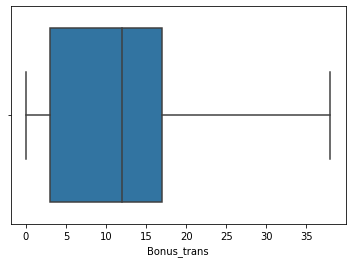

In [334]:
sns.boxplot(data1.Bonus_trans)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


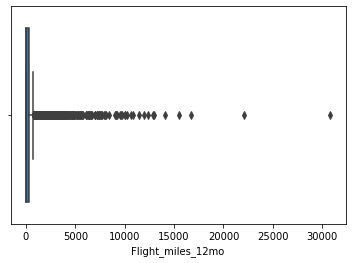

In [335]:
sns.boxplot(data1.Flight_miles_12mo)

In [336]:
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail='both',
                      fold=1.5,
                      variables=['Flight_miles_12mo'])
data1['Flight_miles_12mo']=winsor_iqr.fit_transform(data1[['Flight_miles_12mo']])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


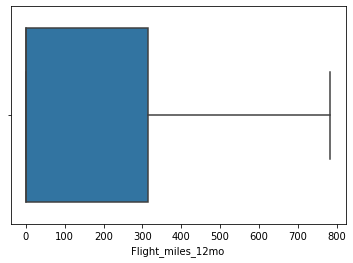

In [337]:
sns.boxplot(data1.Flight_miles_12mo)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


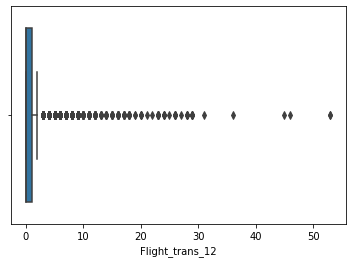

In [338]:
sns.boxplot(data1.Flight_trans_12)

In [339]:
winsor_iqr=Winsorizer(capping_method='iqr',
                      tail="both",
                      fold=1.5,
                      variables=['Flight_trans_12'])
data1['Flight_trans_12']=winsor_iqr.fit_transform(data1[['Flight_trans_12']])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


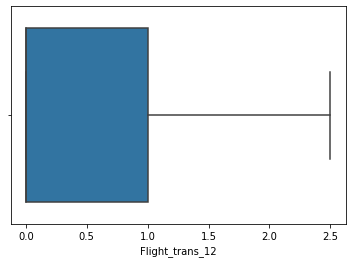

In [340]:
sns.boxplot(data1.Flight_trans_12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


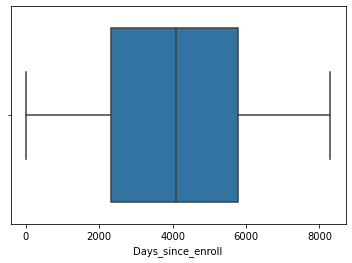

In [341]:
sns.boxplot(data1.Days_since_enroll)

Lets check for zero and near zero variance

In [342]:
data1.var()==0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Balance              False
Qual_miles           False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
dtype: bool

dummy variable creation

In [343]:
data_cate=data1.iloc[:,2:5]
data_cate.head()
data_cate.columns

Index(['cc1_miles', 'cc2_miles', 'cc3_miles'], dtype='object')

In [344]:
from pandas.core.internals import concat
data_num1=data1.iloc[:,5:]
data_num2=data1.iloc[:,0:2]
data_num = pd.concat([data_num2, data_num1], axis=1, join='inner')
data_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0,174.0,1.0,0.00,0.0,7000
1,19244.0,0,215.0,2.0,0.00,0.0,6968
2,41354.0,0,4123.0,4.0,0.00,0.0,7034
3,14776.0,0,500.0,1.0,0.00,0.0,6952
4,97752.0,0,43300.0,26.0,783.75,2.5,6935


In [345]:
data_cate=pd.get_dummies(data_cate,columns=['cc1_miles','cc2_miles','cc3_miles'],drop_first=True)
data_cate

,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3994,0,0,0,0,0,0,0,0,0,0
3995,0,0,0,0,0,0,0,0,0,0
3996,0,1,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0


In [346]:
data_cate.shape
data_cate.dtypes

cc1_miles_2    uint8
cc1_miles_3    uint8
cc1_miles_4    uint8
cc1_miles_5    uint8
cc2_miles_2    uint8
cc2_miles_3    uint8
cc3_miles_2    uint8
cc3_miles_3    uint8
cc3_miles_4    uint8
cc3_miles_5    uint8
dtype: object

In [347]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935


lets draw the histogram to check the data spread 

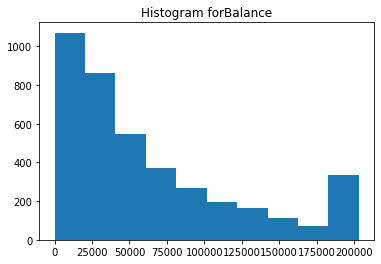

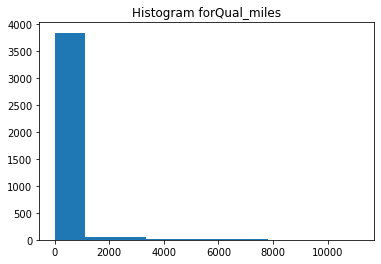

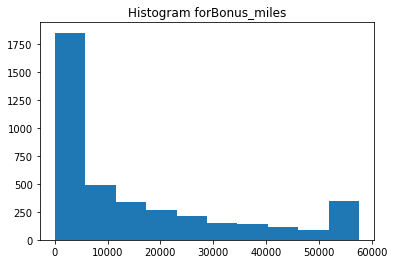

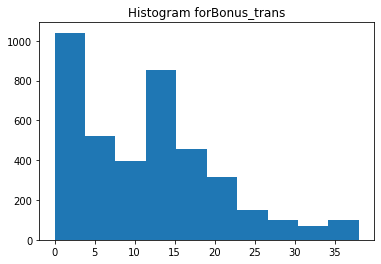

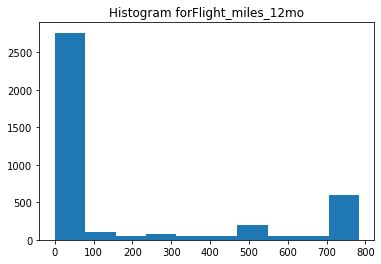

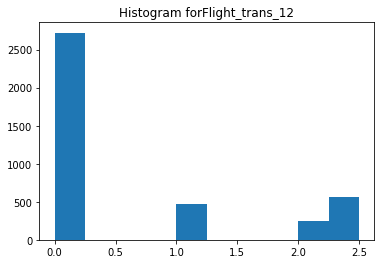

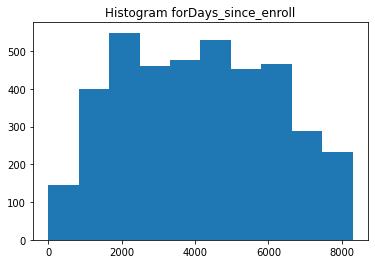

In [348]:
for i in data_num.columns:
  plt.hist(x=data_num[i])
  plt.title('Histogram for'+str(i))
  plt.show()

In [349]:
import scipy.stats as stats
import pylab

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([0.00000000e+00, 5.00000000e+01, 6.80000000e+01, ...,
         2.03211125e+05, 2.03211125e+05, 2.03211125e+05])),
 (54071.11669313825, 63783.82847673836, 0.9209560587194046))

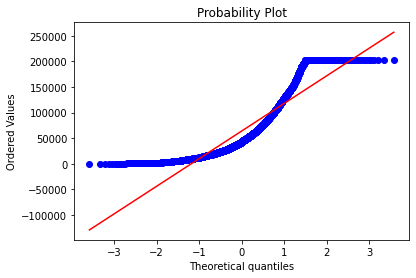

In [350]:
stats.probplot(data_num.Balance,dist="norm",plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([ 0.        ,  3.6840315 ,  4.0816551 , ..., 58.79167407,
         58.79167407, 58.79167407])),
 (12.539250086672636, 35.91148887939728, 0.9897000306299079))

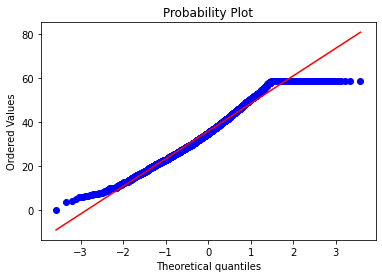

In [351]:
stats.probplot(np.cbrt(data_num.Balance), dist = "norm", plot = pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([    0,     0,     0, ..., 10074, 10098, 11148])),
 (334.1717554199781, 144.15057528764376, 0.43158395197009713))

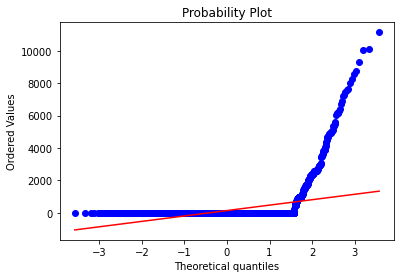

In [352]:
stats.probplot(data_num.Qual_miles,dist='norm',plot=pylab)

In [353]:
from feature_engine import transformation

(array([3.843e+03, 5.400e+01, 4.700e+01, 1.600e+01, 1.600e+01, 7.000e+00,
        7.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([    0. ,  1114.8,  2229.6,  3344.4,  4459.2,  5574. ,  6688.8,
         7803.6,  8918.4, 10033.2, 11148. ]),
 <a list of 10 Patch objects>)

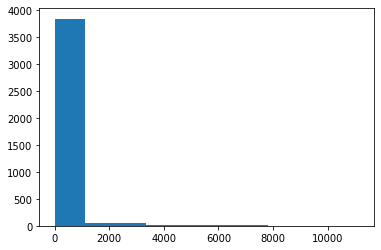

In [354]:
plt.hist(data_num.Qual_miles)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([    0.   ,     0.   ,     0.   , ..., 57651.875, 57651.875,
         57651.875])),
 (16147.384303847672, 15416.37746998499, 0.8925141855698389))

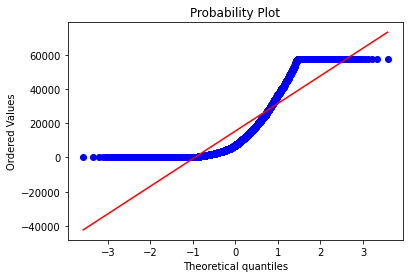

In [355]:
stats.probplot(data_num.Bonus_miles,dist='norm',plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([ 0.       ,  0.       ,  0.       , ..., 38.6311656, 38.6311656,
         38.6311656])),
 (11.485399269369115, 19.520154096003964, 0.9777722997372152))

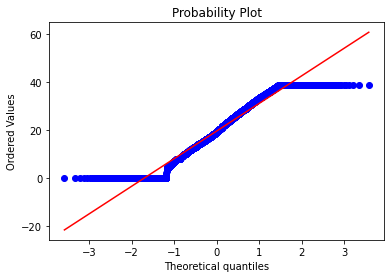

In [356]:
stats.probplot(np.cbrt(data_num.Bonus_miles),dist="norm",plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([ 0.,  0.,  0., ..., 38., 38., 38.])),
 (8.799832872521053, 11.473486743371684, 0.9648166705150938))

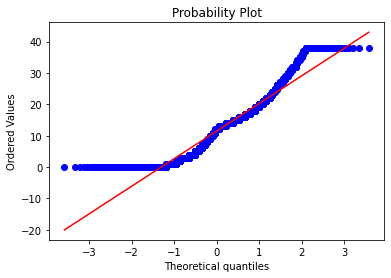

In [357]:
stats.probplot(data_num.Bonus_trans,dist='norm',plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([ 0.       ,  0.       ,  0.       , ..., 38.6311656, 38.6311656,
         38.6311656])),
 (11.485399269369115, 19.520154096003964, 0.9777722997372152))

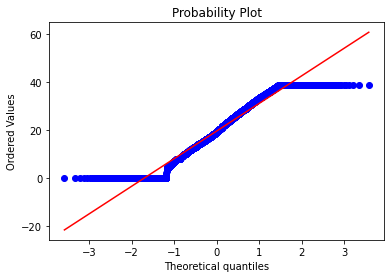

In [358]:
stats.probplot(np.cbrt(data_num.Bonus_miles),dist="norm",plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([  0.  ,   0.  ,   0.  , ..., 783.75, 783.75, 783.75])),
 (232.87238765020933, 178.98968234117055, 0.7848264953268196))

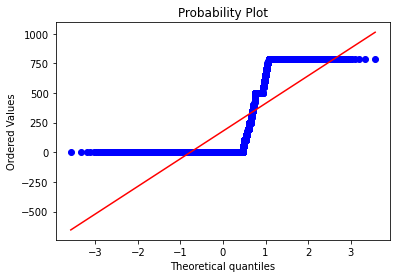

In [359]:
stats.probplot(data_num.Flight_miles_12mo,dist='norm',plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([0. , 0. , 0. , ..., 2.5, 2.5, 2.5])),
 (0.751573751030989, 0.5916708354177087, 0.7948529702641566))

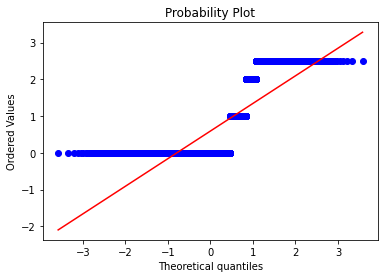

In [360]:
stats.probplot(data_num.Flight_trans_12,dist='norm',plot=pylab)

((array([-3.57763519, -3.33873965, -3.20688667, ...,  3.20688667,
          3.33873965,  3.57763519]),
  array([   2,    8,   10, ..., 8296, 8296, 8296])),
 (2040.2648467461256, 4119.190095047524, 0.9873364002343444))

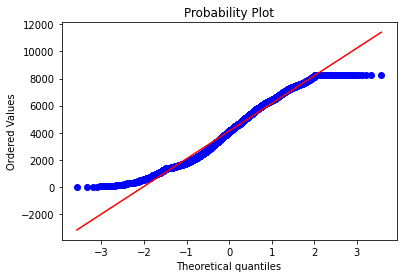

In [361]:
stats.probplot(data_num.Days_since_enroll,dist='norm',plot=pylab)

In [362]:
data_num.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0,174.0,1.0,0.00,0.0,7000
1,19244.0,0,215.0,2.0,0.00,0.0,6968
2,41354.0,0,4123.0,4.0,0.00,0.0,7034
3,14776.0,0,500.0,1.0,0.00,0.0,6952
4,97752.0,0,43300.0,26.0,783.75,2.5,6935


In [363]:
data2=pd.concat([data_cate,data_num],axis=1)
data2.head()

,cc1_miles_2,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,0,0,0,0,0,0,0,0,0,28143.0,0,174.0,1.0,0.00,0.0,7000
1,0,0,0,0,0,0,0,0,0,0,19244.0,0,215.0,2.0,0.00,0.0,6968
2,0,0,0,0,0,0,0,0,0,0,41354.0,0,4123.0,4.0,0.00,0.0,7034
3,0,0,0,0,0,0,0,0,0,0,14776.0,0,500.0,1.0,0.00,0.0,6952
4,0,0,1,0,0,0,0,0,0,0,97752.0,0,43300.0,26.0,783.75,2.5,6935


In [364]:
data2.dtypes

cc1_miles_2            uint8
cc1_miles_3            uint8
cc1_miles_4            uint8
cc1_miles_5            uint8
cc2_miles_2            uint8
cc2_miles_3            uint8
cc3_miles_2            uint8
cc3_miles_3            uint8
cc3_miles_4            uint8
cc3_miles_5            uint8
Balance              float64
Qual_miles             int64
Bonus_miles          float64
Bonus_trans          float64
Flight_miles_12mo    float64
Flight_trans_12      float64
Days_since_enroll      int64
dtype: object

In [365]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935


In [366]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)
df_norm = norm_func(data2.iloc[:, 1:])
df_norm.head()

,cc1_miles_3,cc1_miles_4,cc1_miles_5,cc2_miles_2,cc2_miles_3,cc3_miles_2,cc3_miles_3,cc3_miles_4,cc3_miles_5,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138491,0.0,0.003018,0.026316,0.0,0.0,0.843742
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.094700,0.0,0.003729,0.052632,0.0,0.0,0.839884
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203503,0.0,0.071515,0.105263,0.0,0.0,0.847842
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072713,0.0,0.008673,0.026316,0.0,0.0,0.837955
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.481037,0.0,0.751060,0.684211,1.0,1.0,0.835905


#Cluster Model Building



Agglomerative clustering

In [367]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

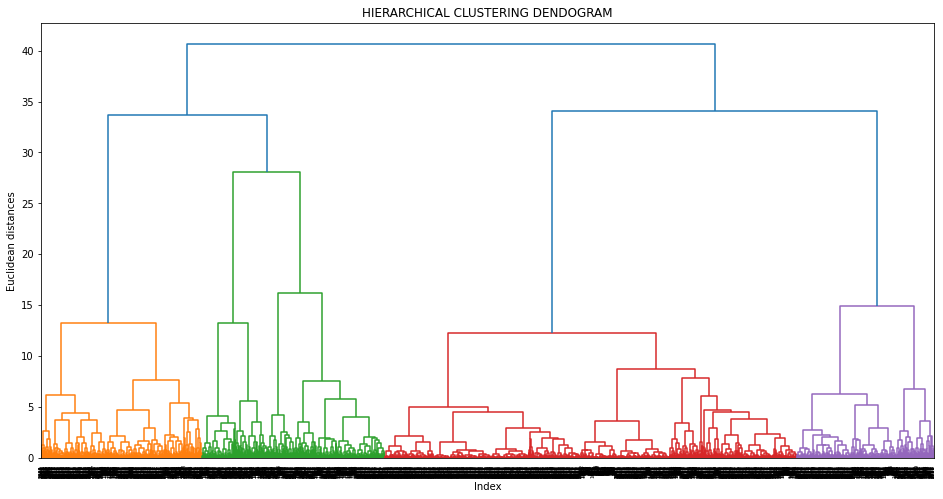

In [368]:
plt.figure(1,figsize=(16,8))
tree_plot=dendrogram(linkage(df_norm,method='ward'))
plt.title('HIERARCHICAL CLUSTERING DENDOGRAM')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

Applying agglomerative clustering choosing 3 as clusters from dendrogram

In [369]:
hc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc1=hc1.fit_predict(df_norm)
y_hc1

array([2, 2, 2, ..., 2, 0, 2])

In [370]:
hc1.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [371]:
cluster_labels=pd.Series(hc1.labels_)

In [372]:
cluster_labels.shape

(3998,)

In [373]:
data.shape

(3998, 10)

add cluster label to orignal dataset

In [374]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935


In [375]:
data1['Cluster']=cluster_labels
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143.0,0,1,1,1,174.0,1.0,0.00,0.0,7000,2.0
1,19244.0,0,1,1,1,215.0,2.0,0.00,0.0,6968,2.0
2,41354.0,0,1,1,1,4123.0,4.0,0.00,0.0,7034,2.0
3,14776.0,0,1,1,1,500.0,1.0,0.00,0.0,6952,2.0
4,97752.0,0,4,1,1,43300.0,26.0,783.75,2.5,6935,0.0


##Cluster evaluation

In [380]:
data3=data1.sort_values(by='Cluster',ascending=True)
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
1281,11542.0,0,4,1,1,49100.0,16.0,783.75,2.5,5405,0.0
3401,22966.0,0,1,1,1,3950.0,8.0,450.00,2.5,1443,0.0
1108,47394.0,0,2,1,1,31347.0,19.0,783.75,2.5,5688,0.0
1105,88929.0,0,4,1,1,44932.0,20.0,650.00,2.0,5694,0.0
3403,37171.0,0,1,1,1,3450.0,5.0,783.75,2.5,1341,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1762,1703.0,0,1,1,1,1230.0,4.0,0.00,0.0,4390,2.0
1763,51471.0,0,3,1,1,15505.0,32.0,412.00,1.0,4450,2.0
1731,65706.0,0,3,1,1,21958.0,17.0,0.00,0.0,4534,2.0
3997,54899.0,0,1,1,1,500.0,1.0,500.00,1.0,1401,2.0


In [381]:
data3.iloc[:, :].groupby(data3.Cluster).mean()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Cluster,,,,,,,
0.0,85266.166276,306.265478,20394.772631,15.116323,615.503518,1.946060,4308.551595
1.0,101541.724389,98.340226,43631.698778,17.823308,40.012688,0.173872,4802.665414
2.0,45890.287464,82.333472,6953.641413,8.451438,15.917987,0.082743,3884.614423


In [378]:
cluster0 = data3.loc[(data3.Cluster == 0), :]
cluster0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
1281,11542.0,0,4,1,1,49100.000,16.0,783.75,2.5,5405,0.0
3401,22966.0,0,1,1,1,3950.000,8.0,450.00,2.5,1443,0.0
1108,47394.0,0,2,1,1,31347.000,19.0,783.75,2.5,5688,0.0
1105,88929.0,0,4,1,1,44932.000,20.0,650.00,2.0,5694,0.0
3403,37171.0,0,1,1,1,3450.000,5.0,783.75,2.5,1341,0.0
...,...,...,...,...,...,...,...,...,...,...,...
576,20126.0,0,5,1,1,57651.875,28.0,783.75,2.5,6506,0.0
578,11143.0,0,1,1,1,2800.000,6.0,783.75,2.5,6529,0.0
103,28667.0,0,1,1,1,3861.000,7.0,783.75,2.5,6749,0.0
2522,147090.0,0,4,1,1,35511.000,31.0,783.75,2.5,2927,0.0


In [379]:
cluster1=data3.loc[(data3.Cluster==1),:]
cluster1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
279,22652.000,0,5,1,1,57642.000,14.0,0.0,0.0,7271,1.0
1394,203211.125,0,5,1,1,56754.000,14.0,0.0,0.0,5302,1.0
3217,142989.000,0,4,1,1,26210.000,14.0,500.0,1.0,2340,1.0
1619,196079.000,0,5,1,1,56890.000,21.0,0.0,0.0,4791,1.0
1618,203211.125,0,5,1,1,57651.875,11.0,0.0,0.0,4791,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2318,188184.000,0,4,1,1,32170.000,13.0,0.0,0.0,3707,1.0
2417,114067.000,0,4,1,1,42569.000,23.0,0.0,0.0,3336,1.0
405,145723.000,0,5,1,1,57651.875,16.0,0.0,0.0,8296,1.0
1154,81952.000,0,5,1,1,57651.875,22.0,0.0,0.0,5427,1.0


In [382]:
cluster2=data3.loc[(data3.Cluster==2),:]
cluster2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
2742,23385.0,0,3,1,1,18303.0,15.0,150.0,1.0,2248,2.0
2953,18939.0,0,1,1,1,855.0,3.0,0.0,0.0,3216,2.0
2765,74352.0,0,3,1,1,17868.0,15.0,0.0,0.0,2188,2.0
2952,158986.0,0,1,1,1,3558.0,14.0,0.0,0.0,3404,2.0
2762,16965.0,1651,1,1,1,2475.0,13.0,0.0,0.0,2182,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1761,11512.0,0,1,1,1,3667.0,14.0,0.0,0.0,4460,2.0
1762,1703.0,0,1,1,1,1230.0,4.0,0.0,0.0,4390,2.0
1763,51471.0,0,3,1,1,15505.0,32.0,412.0,1.0,4450,2.0
1731,65706.0,0,3,1,1,21958.0,17.0,0.0,0.0,4534,2.0


In [384]:
cluster0=data3.loc[(data3.Cluster==0),:]
cluster0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
1281,11542.0,0,4,1,1,49100.000,16.0,783.75,2.5,5405,0.0
3401,22966.0,0,1,1,1,3950.000,8.0,450.00,2.5,1443,0.0
1108,47394.0,0,2,1,1,31347.000,19.0,783.75,2.5,5688,0.0
1105,88929.0,0,4,1,1,44932.000,20.0,650.00,2.0,5694,0.0
3403,37171.0,0,1,1,1,3450.000,5.0,783.75,2.5,1341,0.0
...,...,...,...,...,...,...,...,...,...,...,...
576,20126.0,0,5,1,1,57651.875,28.0,783.75,2.5,6506,0.0
578,11143.0,0,1,1,1,2800.000,6.0,783.75,2.5,6529,0.0
103,28667.0,0,1,1,1,3861.000,7.0,783.75,2.5,6749,0.0
2522,147090.0,0,4,1,1,35511.000,31.0,783.75,2.5,2927,0.0
